<a href="https://colab.research.google.com/github/AliMustapha1/Ali-mustapha/blob/master/lungAndCoronaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
 ## clone github repo
!git clone https://github.com/yassersaadbme/IUL-Final-year-project-biomedical-engineering

fatal: destination path 'IUL-Final-year-project-biomedical-engineering' already exists and is not an empty directory.


# **1.Import Library**

In [18]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
from tensorflow.keras.models import model_from_json # to save module
from keras.models import Sequential #model type 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D # models layers
from sklearn.model_selection import train_test_split # split data
from keras.preprocessing.image import ImageDataGenerator #Augmantation
from keras.optimizers import Adam #Optimizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import IPython #to handle wit html file
import tensorflow as tf

# **2. Read dataset & convert it to numpy arrays**

In [19]:
x_data = []
y_data = []
for i in range(0, 3): # Loop over the ten top-level folders
    images = os.listdir('/content/IUL-Final-year-project-biomedical-engineering/DATASET/' + str(i))
    for image in images:
      image = Image.open('/content/IUL-Final-year-project-biomedical-engineering/DATASET/' + str(i)+ '/' + image).convert('L')
      image = image.resize((100, 100))
      
      arr = np.array(image)
      x_data.append(arr) 
      y_data.append(i)
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = to_categorical(y_data, 10)

#print y_data to test
print(y_data) 
#print shape of x_data & y_data to test
print('Shape of x data: ', x_data.shape)
print('Shape of y data: ', y_data.shape)  

UnidentifiedImageError: ignored

# **check some of the images:**

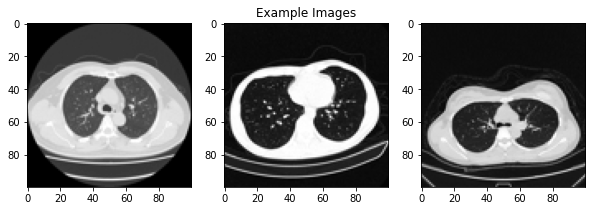

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(x_data[11], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(x_data[102], cmap='gray')
plt.title('Example Images')
plt.subplot(1,3,3)
plt.imshow(x_data[90], cmap='gray');

# **5. Reshaping data**

In [ ]:
# numpy reshape function is used to change matrix format:

x_data = x_data.reshape(-1, 100, 100, 1)

# We also rescale the values in x_data to lie between 0 and 1
x_data /= 255

print('New shape of x_data: ', x_data.shape)

# y_data is already in proper matrix format so no need to reshape it !
print('Shape of y_data: ', y_data.shape)

New shape of x_data:  (2745, 100, 100, 1)
Shape of y_data:  (2745, 10)


# **6.Train and test split**

In [ ]:
# Using 80% of the data for training and 20% for testing and validating. 
# Then we will  using 50% of the data for testing and 50% for validating.

x_train,x_further,y_train,y_further = train_test_split(x_data, y_data, test_size = 0.2)  #random_state = 1
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size = 0.5)

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('....')
print('Shape of x_validate: ', x_validate.shape)
print('Shape of y_validate: ', y_validate.shape)
print('....')
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (2196, 100, 100, 1)
Shape of y_train:  (2196, 10)
....
Shape of x_validate:  (274, 100, 100, 1)
Shape of y_validate:  (274, 10)
....
Shape of x_test:  (275, 100, 100, 1)
Shape of y_test:  (275, 10)


# **7. Data augmentation**

In [ ]:

train_gen = ImageDataGenerator(
                rotation_range = 5,        # 5 degrees of rotation will be applied
                zoom_range = 0.1,          # 10% of zoom will be applied
                width_shift_range = 0.1,   # 10% of shifting will be applied
                height_shift_range = 0.1)  # 10% of shifting will be applied

train_gen.fit(x_train)


# **8. Building the model** 

In [ ]:

model=Sequential()
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(100, 100,1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
  
print(model.summary())



In [ ]:

optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99)

# **9. Fitting the model and Compiling the model**

In [ ]:

batch_size = 20
epochs = 20
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])


ValueError: ignored

In [ ]:
history = model.fit(x_train, y_train, epochs= epochs, batch_size= batch_size, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/20
110/110 [==============================] - 7s 63ms/step - loss: 0.4207 - accuracy: 0.8297 - val_loss: 0.2113 - val_accuracy: 0.9234
Epoch 2/20
110/110 [==============================] - 7s 63ms/step - loss: 0.1113 - accuracy: 0.9731 - val_loss: 0.0867 - val_accuracy: 0.9854
Epoch 3/20
110/110 [==============================] - 7s 61ms/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0116 - val_accuracy: 0.9964
Epoch 4/20
110/110 [==============================] - 7s 62ms/step - loss: 0.0170 - accuracy: 0.9959 - val_loss: 0.0311 - val_accuracy: 0.9891
Epoch 5/20
110/110 [==============================] - 7s 62ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0319 - val_accuracy: 0.9891
Epoch 6/20
110/110 [==============================] - 7s 63ms/step - loss: 0.0090 - accuracy: 0.9982 - val_loss: 3.4107e-04 - val_accuracy: 1.0000
Epoch 7/20
110/110 [==============================] - 7s 62ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0187 - val_accuracy: 0.

In [ ]:
scores = model.evaluate(x_test,y_test,verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 34ms/step - loss: 0.0525 - accuracy: 0.9927
accuracy: 99.27%


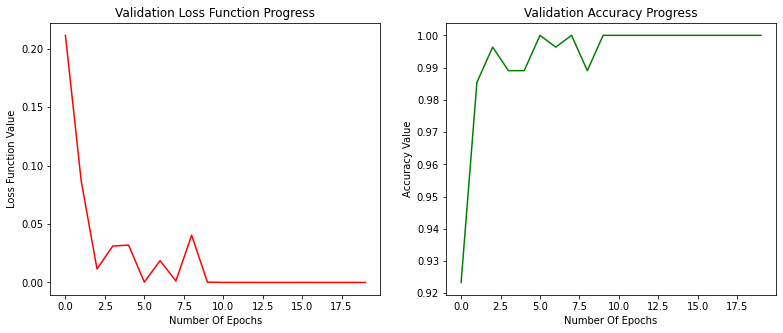

In [ ]:
# Visiualize the validation loss and validation accuracy progress:

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], color = 'r', label = 'validation loss')
plt.title('Validation Loss Function Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss Function Value')

plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'], color = 'g', label = 'validation accuracy')
plt.title('Validation Accuracy Progress')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy Value')
plt.show()

# **11. Evaluation of the predictions**

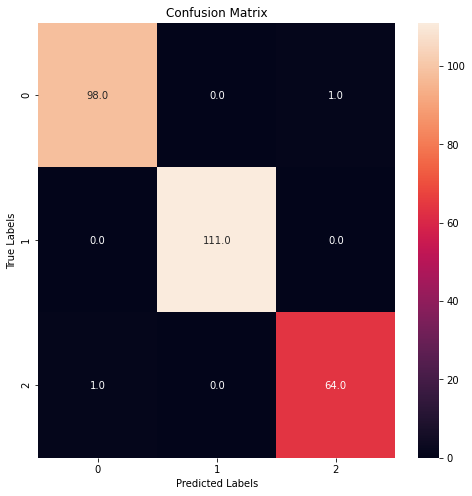

In [ ]:
          
# First of all predict labels from x_test data set and trained model
y_pred = model.predict(x_test)

# Convert prediction classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# Convert validation observations to one hot vectors
y_true_classes = np.argmax(y_test, axis = 1)

# Create the confusion matrix
confmx = confusion_matrix(y_true_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

# **12 To Save Module and weights in model.h5 file **


In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = model.evaluate(x_test,y_test,verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
results = cross_val_score(model, X, Y, cv=kfold)
print("%.2f%%" % (results.mean() * 100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
#if Using Google Collab Feel free to download the model.h5/.jason file in your own pc to upload it later 

9/9 [==============================] - 0s 32ms/step - loss: 0.0525 - accuracy: 0.9927
accuracy: 99.27%
Saved model to disk


# **13 To Load The Modle**

In [ ]:
#you need to create the model first  if you dont excute the whole Code
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# don't forget to compile the model!
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# evaluate loaded model on training data
score = loaded_model.evaluate(x_test,y_test,verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
9/9 [==============================] - 1s 33ms/step - loss: 2.5018 - accuracy: 0.9928
accuracy: 99.27%
